# Plot the muon momentum precision

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('belle2')
import numpy as np
import pdg
import uproot
import pandas as pd

treefile='../Ntuples/MC_mu_50k.root'
with uproot.open(treefile)['B0'] as file:
    df = pd.DataFrame(file.arrays(library="np"))

df['B0_mcPDG'] = df['B0_mcPDG'].fillna(0)
df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df.eval('p_D_l = D_CMS_p + mu_CMS_p', inplace=True)
df.eval('mu_pSig = (mu_mcP-mu_p) / mu_pErr', inplace=True)
df_bestSelected=df.loc[df.groupby('__event__').B_D_ReChi2.idxmin()]

df1 = df.query('nElectrons90 + nMuons90 ==1')

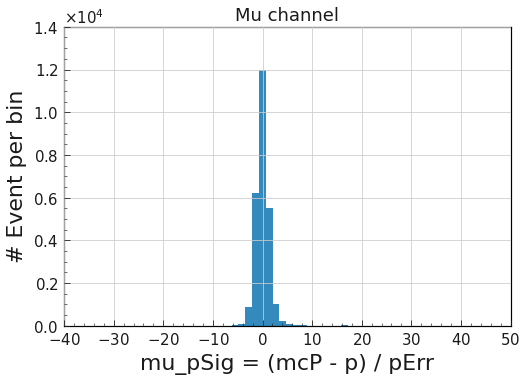

In [11]:
df.mu_pSig.hist(bins=50)
plt.title('Mu channel')
plt.ylabel('# Event per bin')
plt.xlabel('mu_pSig = (mcP - p) / pErr');

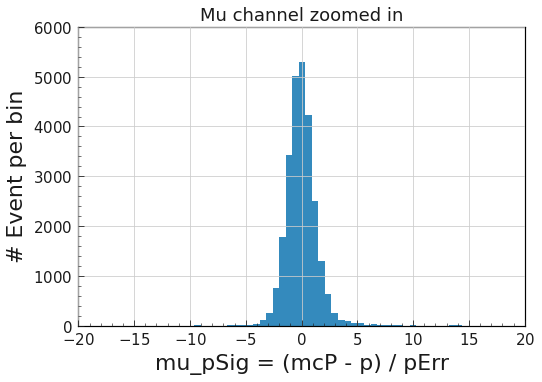

In [12]:
df.query('abs(mu_pSig)<15').mu_pSig.hist(bins=50)
plt.title('Mu channel zoomed in')
plt.ylabel('# Event per bin')
plt.xlabel('mu_pSig = (mcP - p) / pErr');

# DecayHash and signal/background plots

In [1]:
import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util
import decayHash
from decayHash import DecayHashMap

Welcome to JupyROOT 6.24/06


In [2]:
# read a signal mc as a pandas dataframe
filename=f'../B2D_tau_nu/Ntuples/MC_mu_50k_0.parquet'
decayhash=f'../B2D_tau_nu/Ntuples/hashmap_MC_mu_50k.root'
hashmap2 = DecayHashMap(decayhash, removeRadiativeGammaFlag=True)
df = pd.read_parquet(filename, engine="pyarrow")
df_bestSelected=df.loc[df.groupby('__event__').B_D_ReChi2.idxmin()]
df, samples=util.get_dataframe_samples(df_bestSelected,'mu')

for name in samples:
    print(f'{name}: {len(samples[name])}')

$D\tau\nu$: 5847
$D^\ast\tau\nu$: 0
$D\ell\nu$: 11
$D^\ast\ell\nu$: 11
$D^{\ast\ast}\tau\nu$: 0
$D^{\ast\ast}\ell\nu$: 9
bkg_fakeDTC: 805
bkg_fakeB: 428
bkg_continuum: 0
bkg_others: 6


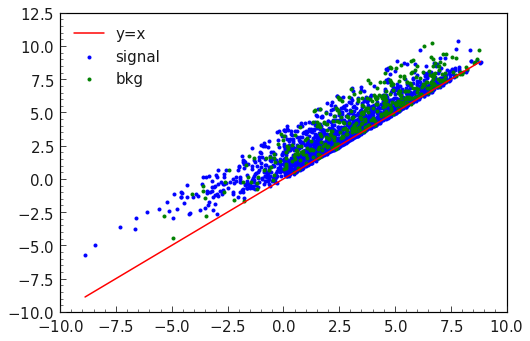

In [27]:
variable='mm2'
sig_mm2_1=withROE_mm2_1(df_bestSelected.query(sig))[variable]
bkg_mm2_1=withROE_mm2_1(df_bestSelected.query(bkg))[variable]
sig_mm2_2=withROE_mm2_2(df_bestSelected.query(sig))[variable]
bkg_mm2_2=withROE_mm2_2(df_bestSelected.query(bkg))[variable]
plt.scatter(sig_mm2_1,sig_mm2_2,marker='.',color='blue',label='signal')
plt.scatter(bkg_mm2_1,bkg_mm2_2,marker='.',color='green',label='bkg')
a=sig_mm2_1.min()
b=sig_mm2_1.max()
plt.plot([a,b],[a,b],color='red',label='y=x')
plt.legend()